# Braille Testbench


In [368]:
import numpy as np
from PIL import Image
import sys
import matplotlib.pyplot as plt

Input image: circle.png


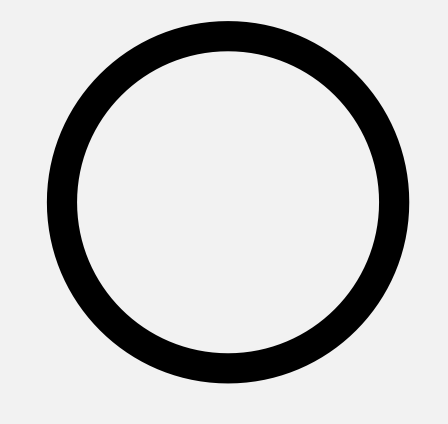

In [369]:
# input options
selection = ['circle.png', 'cross.jpeg', 'square.png', 'triangle.png']
selected = selection[np.random.randint(0,4)]
image = Image.open('shapes/' + selected)
print('Input image: ' + selected)

input = image
input

### Approach 1

/var/folders/d3/ln1h25rs0q3crqwr30hchv2w0000gn/T/ipykernel_85327/2960870270.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  input_img = input_img.resize((6,6), Image.ANTIALIAS)


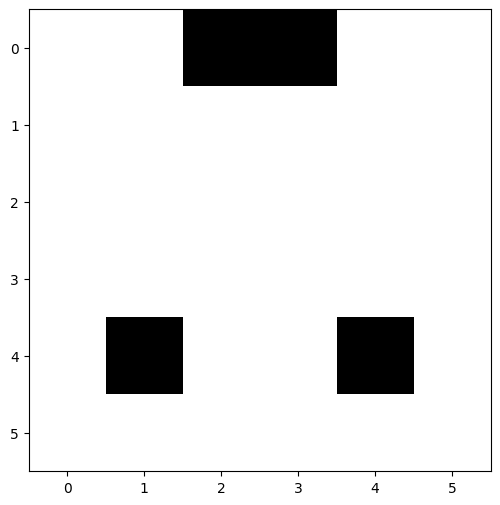

[[ True  True False False  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True False  True  True False  True]
 [ True  True  True  True  True  True]]
[[False False  True  True False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False  True False False  True False]
 [False False False False False False]]

[0, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0]


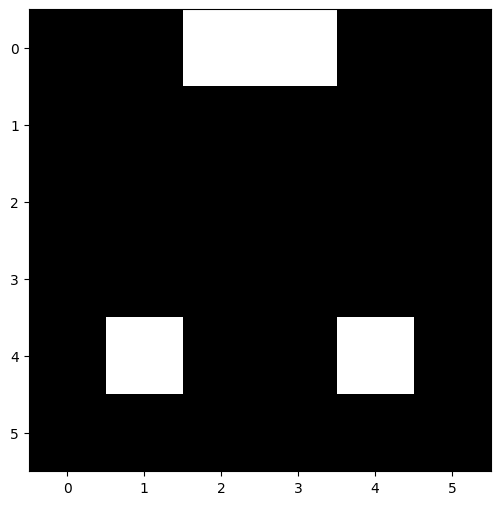

This should be a circle.


In [370]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def process_image(input_image_path, selected):
    # Open the image
    input_img = Image.open(input_image_path)
    # Convert to grayscale
    input_img = input_img.convert('L')
    # Convert closer to black to black and the rest to white
    input_array = np.array(input_img)
    input_array[input_array < 200] = 0
    input_array[input_array >= 200] = 255
    input_img = Image.fromarray(input_array)
    # Remove the background
    input_img = input_img.convert('1')
    # Resize the image to 6x6 pixels
    input_img = input_img.resize((6,6), Image.ANTIALIAS)
    # Display the image
    plt.figure(figsize=(6,6))
    plt.imshow(input_img, cmap='gray')
    plt.show()
    # Print array of image
    output = np.array(input_img)
    print(output)
    # Invert the array
    output = np.invert(output)
    print(output)
    # Loop through every value in the array and use array numoutput to convert to braille where 1 is true and 0 is false
    numoutput = []
    for i in range(0,6):
        for j in range(0,6):
            if output[i][j] == 1:
                numoutput.append(1)
            else:
                numoutput.append(0)
    # Put every 6 on a new line
    print()
    for i in range(0,36,6):
        print(numoutput[i:i+6])
    # Create graph
    graph = np.array(numoutput)
    graph = graph.reshape(6,6)
    plt.figure(figsize=(6,6))
    plt.imshow(graph, cmap='gray')
    plt.show()
    print("This should be a " + selected[:-4] + ".")

process_image('shapes/'+selected, selected)


### Approach 2

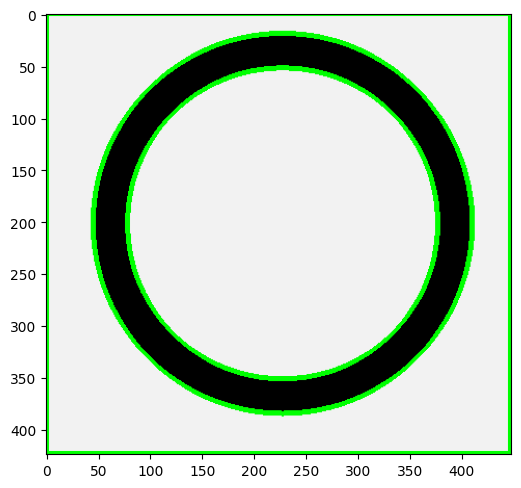

Contour #1


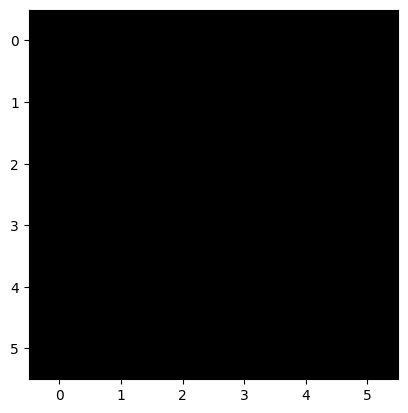

[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
Contour #2


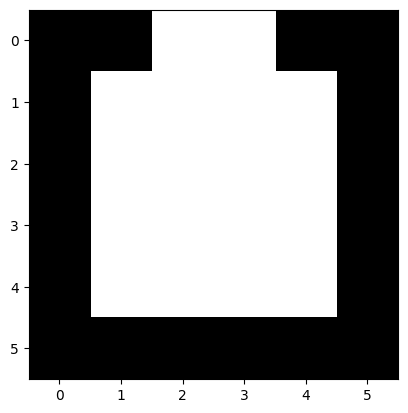

[[0 0 1 1 0 0]
 [0 1 1 1 1 0]
 [0 1 1 1 1 0]
 [0 1 1 1 1 0]
 [0 1 1 1 1 0]
 [0 0 0 0 0 0]]
Contour #3


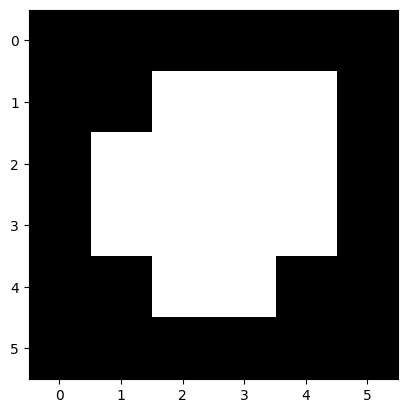

[[0 0 0 0 0 0]
 [0 0 1 1 1 0]
 [0 1 1 1 1 0]
 [0 1 1 1 1 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]]
this should be a circle.


In [371]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image_opencv(input_image_path, selected):
    # Read the image
    img = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

    # Apply a blurring function
    blur = cv2.GaussianBlur(img, (5, 5), 0)

    # Apply a threshold
    ret, thresh = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours and display the image
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert to color to draw colored contours
    cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
    
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

    # Loop through every contour and print as binary arrays
    for i, contour in enumerate(contours):
        # Create a mask to draw the single contour on
        mask = np.zeros_like(thresh)
        cv2.drawContours(mask, [contour], -1, (255), thickness=cv2.FILLED)

        # Resize the mask to 6x6
        mask = cv2.resize(mask, (6, 6))
        # Convert to boolean and invert it
        mask = mask > 0
        # Display mask and print it
        print(f"Contour #{i + 1}")
        plt.imshow(mask, cmap='gray')
        plt.show()
        print(mask.astype(int))
        
    print("this should be a " + selected[:-4] + ".")


process_image_opencv('shapes/'+selected, selected)

